In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pd.options.display.max_rows = 100
REG_ROUND = 4
SPEC_ROUND = 6

### Question 1

In [2]:
df = pd.read_csv("iris.data", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 150
Number of columns: 5


In [4]:
print(f'Column names: {", ".join(df.columns)}')
df['class'].unique()

Column names: sepal length, sepal width, petal length, petal width, class


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Question 2

In [5]:
# 3D plot
def plot_3D_iris(df, cols, view_x, view_y):  
    fig = pp.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    setosaVals = df[df['class'] == 'Iris-setosa'][cols].to_numpy()
    x, y, z = zip(*setosaVals)
    ax.scatter(x, y, z, color='red', label='Iris-Setosa')

    versicolorVals = df[df['class'] == 'Iris-versicolor'][cols].to_numpy()
    x, y, z = zip(*versicolorVals)
    ax.scatter(x, y, z, color='blue', label='Iris-Versicolor')

    virginicaVals = df[df['class'] == 'Iris-virginica'][cols].to_numpy()
    x, y, z = zip(*virginicaVals)
    ax.scatter(x, y, z, color='green', label='Iris-Virginica')

    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])
    ax.set_zlabel(cols[2])
    ax.set_title(f'Graph of {" vs. ".join(cols)}')
    
    ax.legend()

    ax.view_init(view_x, view_y)
    pp.show()

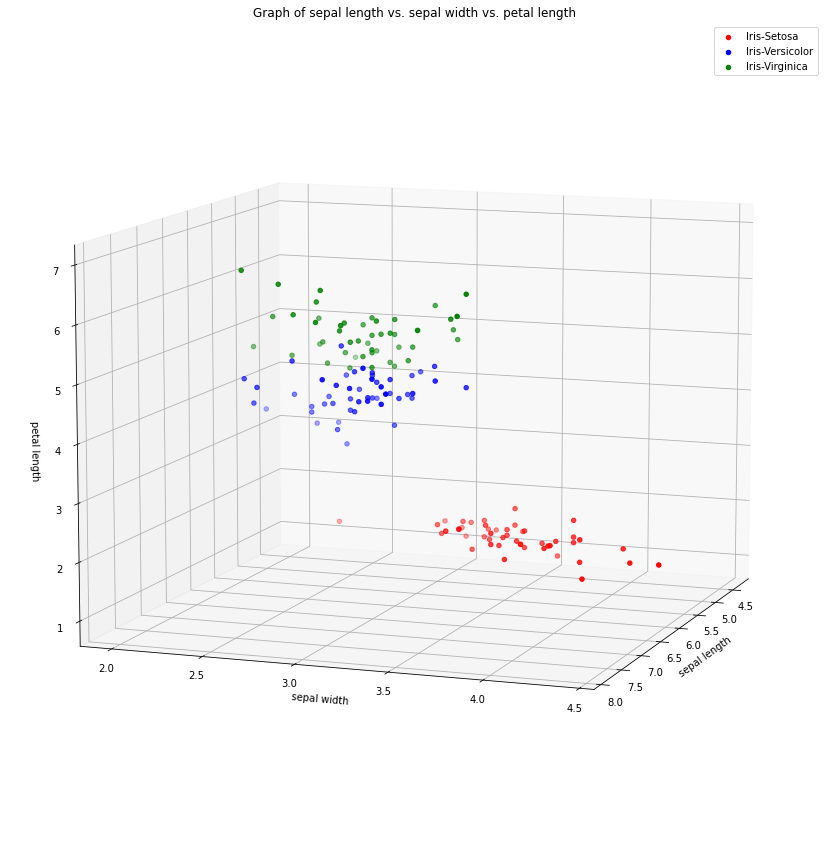

In [6]:
cols = ['sepal length', 'sepal width', 'petal length']
plot_3D_iris(df, cols, 10, 20)

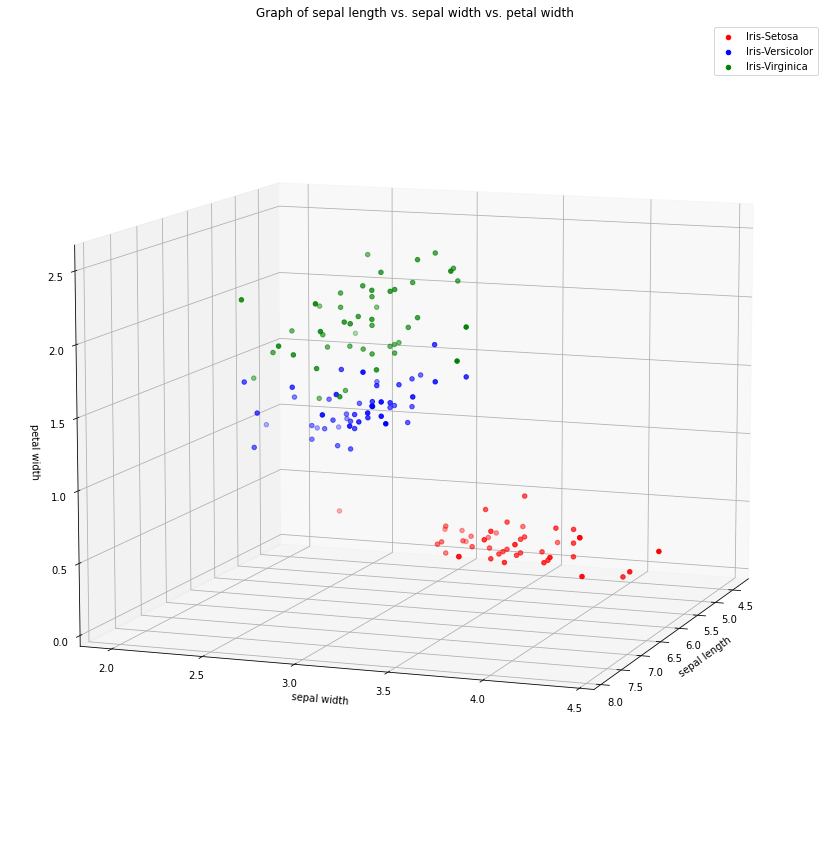

In [7]:
cols = ['sepal length', 'sepal width', 'petal width']
plot_3D_iris(df, cols, 10, 20)

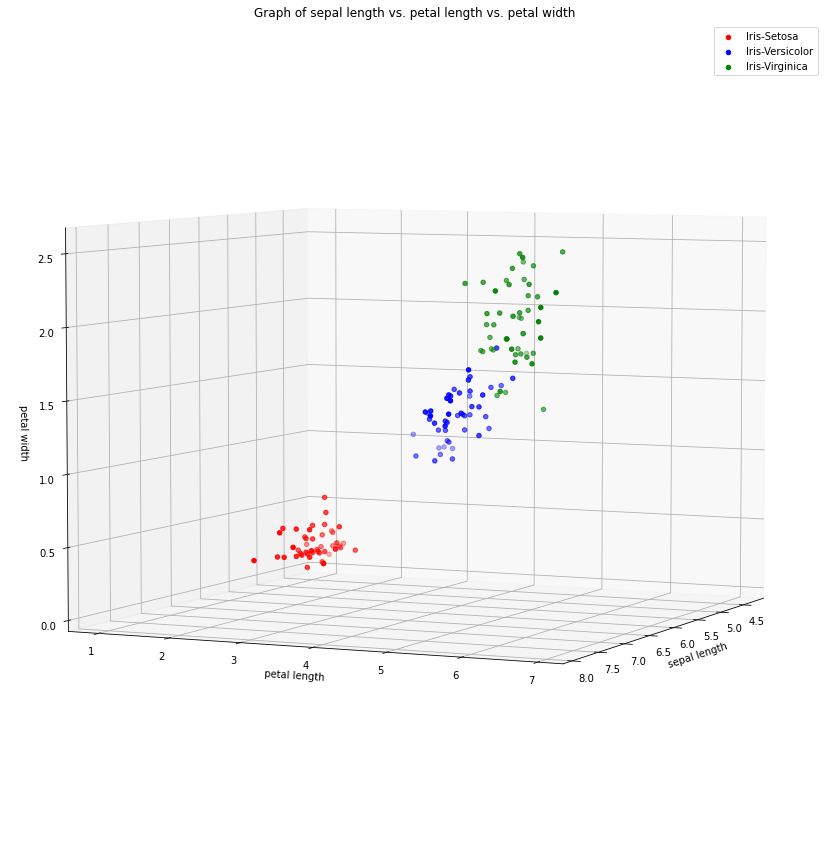

In [8]:
cols = ['sepal length', 'petal length', 'petal width']
plot_3D_iris(df, cols, 5, 25)

### Question 3

In [9]:
mapping = {"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica" : 2}
yValues = np.array([mapping[row] for row in df['class']])
xValues = df.drop('class', axis=1).values

In [10]:
svc_model = SVC(C=1.0, degree=2, kernel='poly', gamma=1)
res = svc_model.fit(xValues, yValues)

In [11]:
print(f'Number of support vectors: {len(res.support_vectors_)}')

Number of support vectors: 15


In [12]:
yPredict = res.predict(xValues)
conf_matrix = confusion_matrix(yValues, yPredict)

In [13]:
def iris_confusion_matrix(conf_matrix, n):
    conf_df = pd.DataFrame(data=conf_matrix, columns=['Actual Setosa', 'Actual Versicolor', 'Actual Virginica'], 
                           index=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'])
    correct = 0
    for x in range(len(conf_matrix)):
        correct += conf_matrix[x][x]
    accuracy = correct / n
    return conf_df, accuracy

conf_matrix, acc = iris_confusion_matrix(conf_matrix, df.shape[0])
print(f'Accuracy: {round(acc, SPEC_ROUND)}')
conf_matrix.head()

Accuracy: 0.98


,Actual Setosa,Actual Versicolor,Actual Virginica
Predicted Setosa,50,0,0
Predicted Versicolor,0,48,2
Predicted Virginica,0,1,49


### Question 4

In [14]:
param_poss = {
    'C': list(np.arange(1, 5)),
    'gamma' : list(np.arange(0, 1, 0.05)),
    'kernel' : ['rbf']
}

ideal_model = GridSearchCV(SVC(), param_poss)
res = ideal_model.fit(xValues, yValues)

In [15]:
yPredict = res.predict(xValues)
conf_matrix = confusion_matrix(yValues, yPredict)

conf_matrix, acc = iris_confusion_matrix(conf_matrix, df.shape[0])
print(f'Accuracy: {round(acc, SPEC_ROUND)}')
conf_matrix.head()

Accuracy: 0.993333


,Actual Setosa,Actual Versicolor,Actual Virginica
Predicted Setosa,50,0,0
Predicted Versicolor,0,49,1
Predicted Virginica,0,0,50


In [16]:
best_params = ideal_model.best_params_
print(f'Best model params\nC: {best_params["C"]}\ngamma: {best_params["gamma"]}')

Best model params
C: 2
gamma: 0.2


### Question 5

In [17]:
pca = PCA()

In [18]:
pca = pca.fit(xValues)
res = pca.transform(xValues)

In [19]:
cols = ['pc1', 'pc2', 'pc3', 'pc4']
pca_df = pd.DataFrame(data=res, columns = cols)
pca_df['class'] = yValues
pca_df.head()

,pc1,pc2,pc3,pc4,class
0,-2.684207,0.326607,-0.021512,0.001006,0
1,-2.715391,-0.169557,-0.203521,0.099602,0
2,-2.889820,-0.137346,0.024709,0.019305,0
3,-2.746437,-0.311124,0.037672,-0.075955,0
4,-2.728593,0.333925,0.096230,-0.063129,0


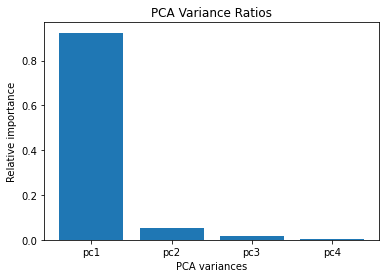

In [20]:
ratios = pca.explained_variance_ratio_
pp.bar(x=cols, height=ratios)
pp.xlabel("PCA variances")
pp.ylabel("Relative importance")
pp.title("PCA Variance Ratios")
pp.show()

It seems that the first principle component is responsible for most of the variance present. This likely means that many of the other components can be ignored without sacrificing too much accuracy.

### Question 7

In [21]:
pca_df_3D = pca_df.drop('pc4', axis=1)
rel_cols = pca_df_3D.columns[:3]

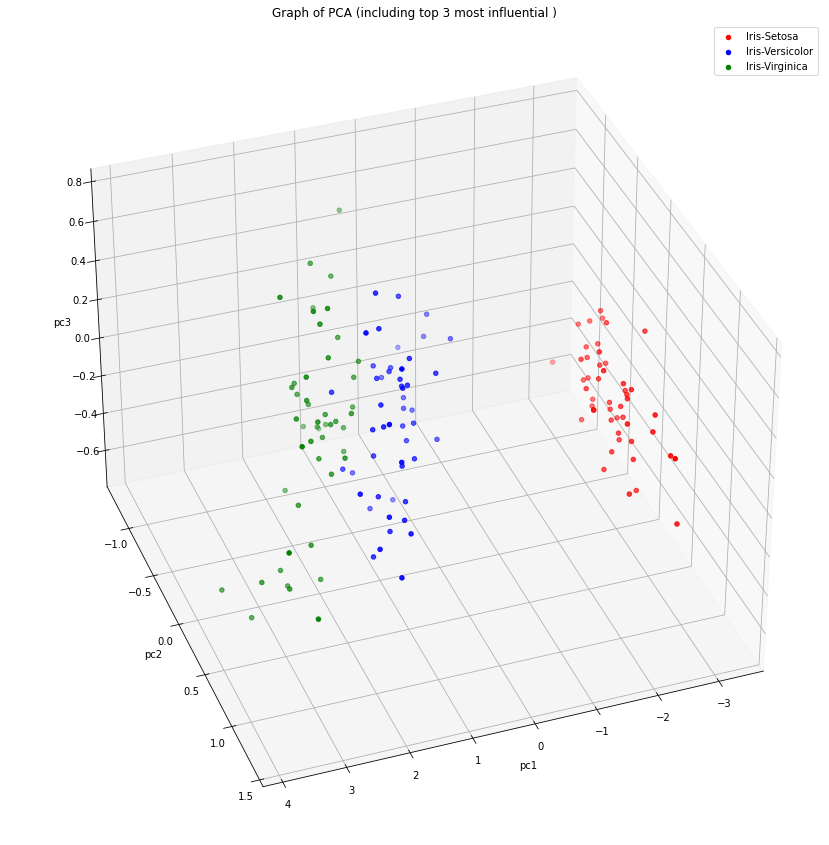

In [22]:
fig = pp.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
setosaVals = pca_df_3D[pca_df_3D['class'] == 0][rel_cols].to_numpy()
x, y, z = zip(*setosaVals)
ax.scatter(x, y, z, color='red', label='Iris-Setosa')

versicolorVals = pca_df_3D[pca_df_3D['class'] == 1][rel_cols].to_numpy()
x, y, z = zip(*versicolorVals)
ax.scatter(x, y, z, color='blue', label='Iris-Versicolor')

virginicaVals = pca_df_3D[pca_df_3D['class'] == 2][rel_cols].to_numpy()
x, y, z = zip(*virginicaVals)
ax.scatter(x, y, z, color='green', label='Iris-Virginica')

ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")
ax.set_title(f'Graph of PCA (including top 3 most influential )')

ax.legend()

ax.view_init(35, 70)
pp.show()

### Question 8

In [23]:
x_3d_vals = pca_df_3D.drop('class', axis=1).values
y_3d_vals = pca_df_3D['class'].values

In [24]:
ideal_model = GridSearchCV(SVC(), param_poss)
res = ideal_model.fit(x_3d_vals, y_3d_vals)

In [25]:
y_3d_predict = res.predict(x_3d_vals)
conf_matrix = confusion_matrix(y_3d_vals, y_3d_predict)

conf_matrix, acc = iris_confusion_matrix(conf_matrix, df.shape[0])
print(f'Accuracy: {round(acc, SPEC_ROUND)}')
conf_matrix.head()

Accuracy: 0.986667


,Actual Setosa,Actual Versicolor,Actual Virginica
Predicted Setosa,50,0,0
Predicted Versicolor,0,49,1
Predicted Virginica,0,1,49


In [26]:
best_params = ideal_model.best_params_
print(f'Best model params\nC: {best_params["C"]}\ngamma: {best_params["gamma"]}')

Best model params
C: 2
gamma: 0.1


### Question 9

In [27]:
pca_df_2D = pca_df_3D.drop('pc3', axis=1)
rel_cols = pca_df_2D.columns[:2]

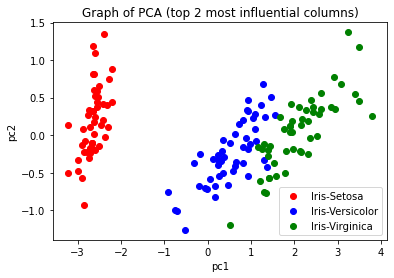

In [28]:
setosaVals = pca_df_2D[pca_df_2D['class'] == 0][rel_cols].to_numpy()
x, y = zip(*setosaVals)
pp.scatter(x, y, color='red', label='Iris-Setosa')

versicolorVals = pca_df_2D[pca_df_2D['class'] == 1][rel_cols].to_numpy()
x, y = zip(*versicolorVals)
pp.scatter(x, y, color='blue', label='Iris-Versicolor')

virginicaVals = pca_df_2D[pca_df_2D['class'] == 2][rel_cols].to_numpy()
x, y = zip(*virginicaVals)
pp.scatter(x, y, color='green', label='Iris-Virginica')

pp.xlabel("pc1")
pp.ylabel("pc2")
pp.title(f'Graph of PCA (top 2 most influential columns)')

pp.legend()

pp.show()

### Question 10

In [29]:
x_2d_vals = pca_df_2D.drop('class', axis=1).values
y_2d_vals = pca_df_2D['class'].values

ideal_model = GridSearchCV(SVC(), param_poss)
res = ideal_model.fit(x_2d_vals, y_2d_vals)

y_2d_predict = res.predict(x_2d_vals)
conf_matrix = confusion_matrix(y_2d_vals, y_2d_predict)

conf_matrix, acc = iris_confusion_matrix(conf_matrix, df.shape[0])
print(f'Accuracy: {round(acc, SPEC_ROUND)}')
conf_matrix.head()

Accuracy: 0.953333


,Actual Setosa,Actual Versicolor,Actual Virginica
Predicted Setosa,50,0,0
Predicted Versicolor,0,47,3
Predicted Virginica,0,4,46


In [33]:
best_params = ideal_model.best_params_
print(f'Best model params\nC: {best_params["C"]}\ngamma: {round(best_params["gamma"], SPEC_ROUND)}')

Best model params
C: 1
gamma: 0.15


### Question 11

In [31]:
svc_model = SVC(C=1.0, kernel='rbf', gamma=0.2)
res = svc_model.fit(x_2d_vals, y_2d_vals)
x_vals = pca_df_2D.drop('class', axis=1).values
y_vals = pca_df_2D['class'].values

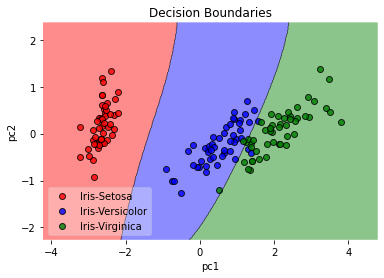

In [32]:
ax = plot_decision_regions(x_vals, y_vals, res, legend=0, colors="red,blue,green", markers="o")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'], 
           framealpha=0.3, scatterpoints=1)
pp.xlabel('pc1')
pp.ylabel('pc2')
pp.title("Decision Boundaries")
pp.show()

### Question 12

With PCA, using more features to predict classifications can be helpful, but as seen in this exercise, often times it is a lot of effort for only a little gain. Not only that, but considering more parameters may actually falsely-fit things that are simply not correlated to the classification. This exercise has demonstrated that with PCA, for many low-percentage influence columns, they can be omitted whilst still retaining a lot of accuracy. 